In [1]:
utf8::utf8_print('\U0001f6a7 work in progress \U0001f6a7')

[1] "🚧​ work in progress 🚧​"


# Get the final dataset

**Goal:** bla

This notebook is divided in ? parts:
* **1 .Bla**: bla

**Refs:**
* [`first_analysis.ipynb`](https://github.com/ElsaB/impact-annotator/blob/master/analysis/description/180731_pierre/first_analysis.ipynb)
* [`click_annotvcf_annotations_analysis.ipynb`](https://github.com/ElsaB/impact-annotator/blob/master/analysis/description/180731_pierre/click_annotvcf_annotations_analysis.ipynb)

In [2]:
source("../../src/utils/custom_tools.R")
setup_environment("../../src/utils")

Warning message:
“package ‘dplyr’ was built under R version 3.5.1”

In [3]:
impact <- read.table("../../data/all_IMPACT_mutations_180508.txt", sep = "\t", stringsAsFactors = FALSE, header = TRUE)

In [4]:
nrow(impact)

[1] 588547

## Get click_annotvcf annotations

Get the features from `click_annotvcf_IMPACT_mutations_180508.txt` (impact annotated by the click_annotvcf pipeline).

### Get the raw data

In [5]:
impact_annotated <- read.table("../../data/annotate_with_click_annotvcf/click_annotvcf_IMPACT_mutations_180508.txt",
                               sep = "\t", stringsAsFactors = FALSE, header = TRUE, comment = "#")

In [6]:
ncol(impact_annotated)
nrow(impact_annotated)
head(impact_annotated)

[1] 156

[1] 406833

ID_VARIANT    TARGET_NAME REFERENCE_NAME CHR START   END     REF ALT
1 1_2487766_T_C NA          NA             1   2487766 2487766 T   C  
2 1_2487954_G_A NA          NA             1   2487954 2487954 G   A  
3 1_2487984_C_A NA          NA             1   2487984 2487984 C   A  
4 1_2487998_C_G NA          NA             1   2487998 2487998 C   G  
5 1_2487998_C_T NA          NA             1   2487998 2487998 C   T  
6 1_2488032_A_G NA          NA             1   2488032 2488032 A   G  
  CONTEXT_5 CHANGE CONTEXT_3 QUAL CALLED_BY PASSED_BY NUMBER_OF_CALLERS
1 TGGAA     C      GGTGC     NA   NA        NA        0                
2 GCTCG     A      GTTCT     NA   NA        NA        0                
3 CGAGG     A      GGATT     NA   NA        NA        0                
4 TTTCT     G      TTTCT     NA   NA        NA        0                
5 TTTCT     T      TTTCT     NA   NA        NA        0                
6 CAGCA     G      TGGCG     NA   NA        NA        0                
  FLAGS_ALL TARGET_VAF_MEAN TARGET_VAF_STD REFERENCE_VAF_MEAN REFERENCE_VAF_STD
1 PASS      NA              NA             NA                 NA               
2 PASS      NA              NA             NA                 NA               
3 PASS      NA              NA             NA                 NA               
4 PASS      NA              NA             NA                 NA               
5 PASS      NA              NA             NA                 NA               
6 PASS      NA              NA             NA                 NA               
  mutect_TARGET_VAF mutect_TARGET_DEPTH mutect_REFERENCE_VAF
1 NA                NA                  NA                  
2 NA                NA                  NA                  
3 NA                NA                  NA                  
4 NA                NA                  NA                  
5 NA                NA                  NA                  
6 NA                NA                  NA                  
  mutect_REFERENCE_DEPTH mutect_DIRPROP mutect_READS_FORWARD
1 NA                     NA             NA                  
2 NA                     NA             NA                  
3 NA                     NA             NA                  
4 NA                     NA             NA                  
5 NA                     NA             NA                  
6 NA                     NA             NA                  
  mutect_READS_REVERSE strelka_TARGET_VAF strelka_TARGET_DEPTH
1 NA                   NA                 NA                  
2 NA                   NA                 NA                  
3 NA                   NA                 NA                  
4 NA                   NA                 NA                  
5 NA                   NA                 NA                  
6 NA                   NA                 NA                  
  strelka_REFERENCE_VAF strelka_REFERENCE_DEPTH caveman_TARGET_VAF
1 NA                    NA                      NA                
2 NA                    NA                      NA                
3 NA                    NA                      NA                
4 NA                    NA                      NA                
5 NA                    NA                      NA                
6 NA                    NA                      NA                
  caveman_TARGET_DEPTH caveman_REFERENCE_VAF caveman_REFERENCE_DEPTH
1 NA                   NA                    NA                     
2 NA                   NA                    NA                     
3 NA                   NA                    NA                     
4 NA                   NA                    NA                     
5 NA                   NA                    NA                     
6 NA                   NA                    NA                     
  caveman_DIRPROP caveman_READS_FORWARD caveman_READS_REVERSE CAVEMAN_DS
1 NA              NA                    NA                    NA        
2 NA              NA                    NA      

We keep the following features:
* `id_colnames`: variant identification columns (chromosome, start position, ...)
* `vag_colnames`: VAGrENT most deleterious annotation
* `vep_colnames`: VEP v92 annotations
     * `VEP_BIOTYPE`: Biotype of transcript or regulatory feature
     * ...
* `vep_add_colnames`: VEP v92 annotations (polyphen: 2.2.2, sift: sift5.2.2, COSMIC v81)
    * `VEP_IMPACT`: Subjective impact classification of consequence type
    * `VEP_CLIN_SIG`: ClinVar clinical significance of the dbSNP variant
    * `VEP_AF`: Frequency of existing variant in 1000 Genomes combined population
    * `VEP MAX_AF`: Maximum observed allele frequency in 1000 Genomes, ESP and ExAC/gnomAD
    * `VEP MAX_AF_POPS`: Populations in which maximum allele frequency was observed
    * ...

In [7]:
id_colnames  <- c("ID_VARIANT", "CHR", "START", "END", "REF", "ALT")
vag_colnames <- c("VAG_VT", "VAG_GENE", "VAG_cDNA_CHANGE", "VAG_PROTEIN_CHANGE", "VAG_EFFECT")
vep_colnames <- c("VEP_Consequence", "VEP_SYMBOL", "VEP_HGVSc", "VEP_HGVSp", "VEP_Amino_acids", "VEP_VARIANT_CLASS", "VEP_BIOTYPE")
vep_add_colnames <- c("VEP_IMPACT", "VEP_CLIN_SIG",
                       "VEP_AF", "VEP_MAX_AF", "VEP_MAX_AF_POPS", "VEP_gnomAD_AF",
                       "VEP_SIFT", "VEP_PolyPhen", "VEP_COSMIC_CNT")

colnames_to_keep <- c(id_colnames, vag_colnames, vep_colnames, vep_add_colnames)

impact_annotated <- impact_annotated[, colnames_to_keep]

### Add the `OLD_REF`, `OLD_ALT` and `OLD_POS` features from the `.vcf`

In [8]:
impact_vcf <- read.table("../../data/annotate_with_click_annotvcf/all_IMPACT_mutations_180508.vcf",
                               sep = "\t", stringsAsFactors = FALSE, header = FALSE, comment = "#")
colnames(impact_vcf) <- c("CHROM", "POS", "ID", "REF", "ALT", "QUAL", "FILTER", "INFO", "FORMAT")

In [9]:
ncol(impact_vcf)
nrow(impact_vcf)
head(impact_vcf)

[1] 9

[1] 406833

CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO,FORMAT
1,16265908,.,A,T,.,.,OLD_REF_ALT_POS=A/T/16265908,.
2,29543736,.,A,G,.,.,OLD_REF_ALT_POS=A/G/29543736,.
2,242793433,.,G,A,.,.,OLD_REF_ALT_POS=G/A/242793433,.
5,56177843,.,C,G,.,.,OLD_REF_ALT_POS=C/G/56177843,.
5,180030313,.,C,A,.,.,OLD_REF_ALT_POS=C/A/180030313,.
5,180051003,.,T,C,.,.,OLD_REF_ALT_POS=T/C/180051003,.


In [10]:
dd <- head(unique(impact_vcf$INFO), 10)
dd <- data.frame(dd,
                 sapply(dd, function(x) strsplit(strsplit(x, '=')[[1]][2], '/')[[1]][1]),
                 sapply(dd, function(x) strsplit(strsplit(x, '=')[[1]][2], '/')[[1]][2]),
                 sapply(dd, function(x) strsplit(strsplit(x, '=')[[1]][2], '/')[[1]][3]),
                 row.names = NULL)
colnames(dd) <- c("old", "new1", "new2", "new_3")
dd

old,new1,new2,new_3
OLD_REF_ALT_POS=A/T/16265908,A,T,16265908
OLD_REF_ALT_POS=A/G/29543736,A,G,29543736
OLD_REF_ALT_POS=G/A/242793433,G,A,242793433
OLD_REF_ALT_POS=C/G/56177843,C,G,56177843
OLD_REF_ALT_POS=C/A/180030313,C,A,180030313
OLD_REF_ALT_POS=T/C/180051003,T,C,180051003
OLD_REF_ALT_POS=C/T/32178570,C,T,32178570
OLD_REF_ALT_POS=G/A/32188823,G,A,32188823
OLD_REF_ALT_POS=C/T/151945083,C,T,151945083
OLD_REF_ALT_POS=G/A/49433883,G,A,49433883


In [11]:
impact_vcf$OLD_REF <- sapply(impact_vcf$INFO, function(x) strsplit(strsplit(x, '=')[[1]][2], '/')[[1]][1])
impact_vcf$OLD_ALT <- sapply(impact_vcf$INFO, function(x) strsplit(strsplit(x, '=')[[1]][2], '/')[[1]][2])
impact_vcf$OLD_POS <- sapply(impact_vcf$INFO, function(x) strsplit(strsplit(x, '=')[[1]][2], '/')[[1]][3])
head(impact_vcf)

CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO,FORMAT,OLD_REF,OLD_ALT,OLD_POS
1,16265908,.,A,T,.,.,OLD_REF_ALT_POS=A/T/16265908,.,A,T,16265908
2,29543736,.,A,G,.,.,OLD_REF_ALT_POS=A/G/29543736,.,A,G,29543736
2,242793433,.,G,A,.,.,OLD_REF_ALT_POS=G/A/242793433,.,G,A,242793433
5,56177843,.,C,G,.,.,OLD_REF_ALT_POS=C/G/56177843,.,C,G,56177843
5,180030313,.,C,A,.,.,OLD_REF_ALT_POS=C/A/180030313,.,C,A,180030313
5,180051003,.,T,C,.,.,OLD_REF_ALT_POS=T/C/180051003,.,T,C,180051003


In [12]:
impact_vcf$join_key <- paste(impact_vcf$CHROM, impact_vcf$POS, impact_vcf$REF, impact_vcf$ALT, sep = '_')
head(impact_vcf$join_key)

[1] "1_16265908_A_T"  "2_29543736_A_G"  "2_242793433_G_A" "5_56177843_C_G" 
[5] "5_180030313_C_A" "5_180051003_T_C"

**Verification 1** The features are not unique for each `join_key`:

In [13]:
impact_vcf <- unique(impact_vcf)
nrow(dd <- impact_vcf %>% group_by(join_key) %>% filter(n() > 1))

[1] 126

In [14]:
head(dd[order(dd$join_key),])

CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO,FORMAT,OLD_REF,OLD_ALT,OLD_POS,join_key
1,2494203,.,CAGG,C,.,.,OLD_REF_ALT_POS=CAGG/C/2494203,.,CAGG,C,2494203,1_2494203_CAGG_C
1,2494203,.,CAGG,C,.,.,OLD_REF_ALT_POS=AGG/-/2494204,.,AGG,-,2494204,1_2494203_CAGG_C
1,27099954,.,AC,A,.,.,OLD_REF_ALT_POS=AC/A/27099954,.,AC,A,27099954,1_27099954_AC_A
1,27099954,.,AC,A,.,.,OLD_REF_ALT_POS=C/-/27099955,.,C,-,27099955,1_27099954_AC_A
1,27106470,.,ACCACTAACTT,A,.,.,OLD_REF_ALT_POS=CCACTAACTT/-/27106471,.,CCACTAACTT,-,27106471,1_27106470_ACCACTAACTT_A
1,27106470,.,ACCACTAACTT,A,.,.,OLD_REF_ALT_POS=ACCACTAACTT/A/27106470,.,ACCACTAACTT,A,27106470,1_27106470_ACCACTAACTT_A


63 mutations were not consistently annotated in impact (when considering the `REF`, `ALT` and `POS` features), these lines will be duplicated in `impact_annotated` to take these mutations into account.

In [15]:
impact_annotated[impact_annotated$ID_VARIANT == "1_2494203_CAGG_C",]

,ID_VARIANT,CHR,START,END,REF,ALT,VAG_VT,VAG_GENE,VAG_cDNA_CHANGE,VAG_PROTEIN_CHANGE,VAG_EFFECT,VEP_Consequence,VEP_SYMBOL,VEP_HGVSc,VEP_HGVSp,VEP_Amino_acids,VEP_VARIANT_CLASS,VEP_BIOTYPE,VEP_IMPACT,VEP_CLIN_SIG,VEP_AF,VEP_MAX_AF,VEP_MAX_AF_POPS,VEP_gnomAD_AF,VEP_SIFT,VEP_PolyPhen,VEP_COSMIC_CNT
401,1_2494203_CAGG_C,1,2494203,2494206,CAGG,C,Del,TNFRSF14,NA,NA,intron_variant,non_coding_transcript_exon_variant,TNFRSF14,ENST00000463471.2:n.3273_3275del,NA,NA,deletion,retained_intron,MODIFIER,NA,0.0012,0.004,EUR,NA,NA,NA,NA
402,1_2494203_CAGG_C,1,2494203,2494206,CAGG,C,Del,TNFRSF14,NA,NA,intron_variant,non_coding_transcript_exon_variant,TNFRSF14,ENST00000463471.2:n.3273_3275del,NA,NA,deletion,retained_intron,MODIFIER,NA,0.0012,0.004,EUR,NA,NA,NA,NA


**Verification 2** Make sure every `impact_annotated` `ID_VARIANT` has an analoguous `join_key` in `impact_vcf`:

In [16]:
impact_annotated <- unique(impact_annotated)
nrow(impact_annotated)

[1] 406770

In [17]:
table(impact_annotated$ID_VARIANT %in% impact_vcf$join_key)


  TRUE 
406770 

In [18]:
impact_annotated <- left_join(impact_annotated, impact_vcf[, c("join_key", "OLD_REF", "OLD_ALT", "OLD_POS")],
                              by = c("ID_VARIANT" = "join_key"))

In [19]:
head(impact_annotated)

ID_VARIANT,CHR,START,END,REF,ALT,VAG_VT,VAG_GENE,VAG_cDNA_CHANGE,VAG_PROTEIN_CHANGE,VAG_EFFECT,VEP_Consequence,VEP_SYMBOL,VEP_HGVSc,VEP_HGVSp,VEP_Amino_acids,VEP_VARIANT_CLASS,VEP_BIOTYPE,VEP_IMPACT,VEP_CLIN_SIG,VEP_AF,VEP_MAX_AF,VEP_MAX_AF_POPS,VEP_gnomAD_AF,VEP_SIFT,VEP_PolyPhen,VEP_COSMIC_CNT,OLD_REF,OLD_ALT,OLD_POS
1_2487766_T_C,1,2487766,2487766,T,C,Sub,TNFRSF14,NA,NA,intron_variant,non_coding_transcript_exon_variant,RP3-395M20.8,ENST00000416860.2:n.405A>G,NA,NA,SNV,antisense,MODIFIER,NA,NA,7.504e-01,AFR,5.321e-01,NA,NA,NA,T,C,2487766
1_2487954_G_A,1,2487954,2487954,G,A,Sub,TNFRSF14,c.?,p.?,5_prime_UTR_variant,5_prime_UTR_variant,TNFRSF14,ENST00000355716.4:c.-150G>A,NA,NA,SNV,protein_coding,MODIFIER,NA,NA,NA,NA,NA,NA,NA,NA,G,A,2487954
1_2487984_C_A,1,2487984,2487984,C,A,Sub,TNFRSF14,c.?,p.?,5_prime_UTR_variant,5_prime_UTR_variant,TNFRSF14,ENST00000355716.4:c.-120C>A,NA,NA,SNV,protein_coding,MODIFIER,NA,NA,NA,NA,NA,NA,NA,NA,C,A,2487984
1_2487998_C_G,1,2487998,2487998,C,G,Sub,TNFRSF14,c.?,p.?,5_prime_UTR_variant,5_prime_UTR_variant,TNFRSF14,ENST00000355716.4:c.-106C>G,NA,NA,SNV,protein_coding,MODIFIER,NA,NA,1.732e-05,gnomAD_NFE,6.670e-06,NA,NA,NA,C,G,2487998
1_2487998_C_T,1,2487998,2487998,C,T,Sub,TNFRSF14,c.?,p.?,5_prime_UTR_variant,5_prime_UTR_variant,TNFRSF14,ENST00000355716.4:c.-106C>T,NA,NA,SNV,protein_coding,MODIFIER,NA,NA,NA,NA,NA,NA,NA,NA,C,T,2487998
1_2488032_A_G,1,2488032,2488032,A,G,Sub,TNFRSF14,c.?,p.?,5_prime_UTR_variant,5_prime_UTR_variant,TNFRSF14,ENST00000355716.4:c.-72A>G,NA,NA,SNV,protein_coding,MODIFIER,NA,NA,NA,NA,NA,NA,NA,NA,A,G,2488032


As seen before, 63 new duplicated lines for the inconsistently annotated mutations.

In [20]:
nrow(impact_annotated)
impact_annotated[impact_annotated$ID_VARIANT == "1_2494203_CAGG_C",]

[1] 406833

,ID_VARIANT,CHR,START,END,REF,ALT,VAG_VT,VAG_GENE,VAG_cDNA_CHANGE,VAG_PROTEIN_CHANGE,VAG_EFFECT,VEP_Consequence,VEP_SYMBOL,VEP_HGVSc,VEP_HGVSp,VEP_Amino_acids,VEP_VARIANT_CLASS,VEP_BIOTYPE,VEP_IMPACT,VEP_CLIN_SIG,VEP_AF,VEP_MAX_AF,VEP_MAX_AF_POPS,VEP_gnomAD_AF,VEP_SIFT,VEP_PolyPhen,VEP_COSMIC_CNT,OLD_REF,OLD_ALT,OLD_POS
401,1_2494203_CAGG_C,1,2494203,2494206,CAGG,C,Del,TNFRSF14,NA,NA,intron_variant,non_coding_transcript_exon_variant,TNFRSF14,ENST00000463471.2:n.3273_3275del,NA,NA,deletion,retained_intron,MODIFIER,NA,0.0012,0.004,EUR,NA,NA,NA,NA,CAGG,C,2494203
402,1_2494203_CAGG_C,1,2494203,2494206,CAGG,C,Del,TNFRSF14,NA,NA,intron_variant,non_coding_transcript_exon_variant,TNFRSF14,ENST00000463471.2:n.3273_3275del,NA,NA,deletion,retained_intron,MODIFIER,NA,0.0012,0.004,EUR,NA,NA,NA,NA,AGG,-,2494204


### Create keys to join the two dataframes and extract the features

We are going to identify each mutation with a key in both dataframes, allowing us to link each mutation from `impact` to its corresponding mutation in `impact_annotated`. The keys will be: 
* `mut_key` for `impact`
* `CHR`\_`OLD_POS`\_`OLD_REF`\_`OLD_ALT` for `impact_annotated`

In [21]:
impact_annotated$join_key <- paste(impact_annotated$CHR, impact_annotated$OLD_POS, impact_annotated$OLD_REF, impact_annotated$OLD_ALT, sep = '_')
head(impact_annotated$join_key)
impact$mut_key <- paste(impact$Chromosome,
                        impact$Start_Position,
                        impact$Reference_Allele,
                        impact$Tumor_Seq_Allele2,
                        sep = '_')
head(impact$mut_key)

[1] "1_2487766_T_C" "1_2487954_G_A" "1_2487984_C_A" "1_2487998_C_G"
[5] "1_2487998_C_T" "1_2488032_A_G"

[1] "1_16265908_A_T"  "2_29543736_A_G"  "2_242793433_G_A" "5_56177843_C_G" 
[5] "5_180030313_C_A" "5_180051003_T_C"

**Verification 1** Make sure every impact `mut_key` has an analoguous `join_key` in `impact_annotated`:

In [22]:
table(impact$mut_key %in% impact_annotated$join_key)


  TRUE 
588547 

**Verification 2** The features are unique for each `join_key`:

In [23]:
impact_annotated <- unique(impact_annotated)
nrow(impact_annotated %>% group_by(join_key) %>% filter(n() > 1))

[1] 0

In [24]:
colnames_to_keep <- c(vag_colnames, vep_colnames, vep_add_colnames)

In [25]:
impact[, colnames_to_keep] <- left_join(impact, impact_annotated,
                                        by = c("mut_key" = "join_key"))[, c(vag_colnames, vep_colnames, vep_add_colnames)]

In [26]:
head(impact)

Hugo_Symbol,Entrez_Gene_Id,Center,NCBI_Build,Chromosome,Start_Position,End_Position,Strand,Consequence,Variant_Type,Reference_Allele,Tumor_Seq_Allele1,Tumor_Seq_Allele2,dbSNP_RS,Tumor_Sample_Barcode,Matched_Norm_Sample_Barcode,Match_Norm_Seq_Allele1,Match_Norm_Seq_Allele2,cDNA_change,HGVSp_Short,t_depth,t_vaf,t_alt_count,n_depth,n_vaf,n_alt_count,t_ref_plus_count,t_ref_neg_count,t_alt_plus_count,t_alt_neg_count,occurence_in_normals,confidence_class,variant_status,sample_coverage,minor_contamination,mut_key,VAG_VT,VAG_GENE,VAG_cDNA_CHANGE,VAG_PROTEIN_CHANGE,VAG_EFFECT,VEP_Consequence,VEP_SYMBOL,VEP_HGVSc,VEP_HGVSp,VEP_Amino_acids,VEP_VARIANT_CLASS,VEP_BIOTYPE,VEP_IMPACT,VEP_CLIN_SIG,VEP_AF,VEP_MAX_AF,VEP_MAX_AF_POPS,VEP_gnomAD_AF,VEP_SIFT,VEP_PolyPhen,VEP_COSMIC_CNT
SPEN,0,MSK-IMPACT,hg19,1,16265908,16265908,+,nonsynonymous_SNV,SNP,A,A,T,novel,P-0000004-T01-IM3,NA,A,A,c.10981A>T,p.I3661F,473,0.15433,73,1071,0.00000,0,166,234,37,36,0,AUTO_OK,NEW_VARIANT,428,0.03556,1_16265908_A_T,Sub,SPEN,c.10981A>T,p.I3661F,non_synonymous_codon,missense_variant,SPEN,ENST00000375759.3:c.10981A>T,ENSP00000364912.3:p.Ile3661Phe,I/F,SNV,protein_coding,MODERATE,NA,NA,NA,NA,NA,deleterious(0),probably_damaging(0.976),NA
ALK,0,MSK-IMPACT,hg19,2,29543736,29543736,+,nonsynonymous_SNV,SNP,A,A,G,novel,P-0000004-T01-IM3,NA,A,A,c.1427T>C,p.V476A,193,0.06736,13,793,0.00000,0,78,102,3,10,0,UNLIKELY,NEW_VARIANT,428,0.03556,2_29543736_A_G,Sub,ALK,c.1427T>C,p.V476A,non_synonymous_codon,missense_variant,ALK,ENST00000389048.3:c.1427T>C,ENSP00000373700.3:p.Val476Ala,V/A,SNV,protein_coding,MODERATE,benign&likely_benign,0.0160,0.05297,gnomAD_ASJ,0.02858,tolerated(0.91),benign(0),1
PDCD1,0,MSK-IMPACT,hg19,2,242793433,242793433,+,nonsynonymous_SNV,SNP,G,G,A,novel,P-0000004-T01-IM3,NA,G,G,c.644C>T,p.A215V,240,0.06250,15,712,0.00140,1,89,136,5,10,0,UNLIKELY,NEW_VARIANT,428,0.03556,2_242793433_G_A,Sub,PDCD1,c.644C>T,p.A215V,non_synonymous_codon,missense_variant,PDCD1,ENST00000334409.5:c.644C>T,ENSP00000335062.5:p.Ala215Val,A/V,SNV,protein_coding,MODERATE,NA,0.1368,0.49020,gnomAD_EAS,0.09123,tolerated(0.27),benign(0.261),2
MAP3K1,0,MSK-IMPACT,hg19,5,56177843,56177843,+,nonsynonymous_SNV,SNP,C,C,G,novel,P-0000004-T01-IM3,NA,C,C,c.2816C>G,p.S939C,382,0.03141,12,666,0.00000,0,200,170,8,4,0,UNLIKELY,NEW_VARIANT,428,0.03556,5_56177843_C_G,Sub,MAP3K1,c.2816C>G,p.S939C,non_synonymous_codon,missense_variant,MAP3K1,ENST00000399503.3:c.2816C>G,ENSP00000382423.3:p.Ser939Cys,S/C,SNV,protein_coding,MODERATE,NA,0.0074,0.04344,gnomAD_ASJ,0.01570,tolerated_low_confidence(0.08),benign(0.078),NA
FLT4,0,MSK-IMPACT,hg19,5,180030313,180030313,+,nonsynonymous_SNV,SNP,C,C,A,novel,P-0000004-T01-IM3,NA,C,C,c.3971G>T,p.R1324L,385,0.06494,25,1112,0.00270,3,182,178,12,13,0,UNLIKELY,NEW_VARIANT,428,0.03556,5_180030313_C_A,Sub,FLT4,c.3971G>T,p.R1324L,non_synonymous_codon,missense_variant,FLT4,ENST00000261937.6:c.3971G>T,ENSP00000261937.6:p.Arg1324Leu,R/L,SNV,protein_coding,MODERATE,benign&likely_benign,NA,0.11000,gnomAD_NFE,0.07872,tolerated_low_confidence(0.65),benign(0),1
FLT4,0,MSK-IMPACT,hg19,5,180051003,180051003,+,nonsynonymous_SNV,SNP,T,T,C,novel,P-0000004-T01-IM3,NA,T,T,c.1480A>G,p.T494A,295,0.07458,22,977,0.00102,1,116,157,8,14,0,UNLIKELY,NEW_VARIANT,428,0.03556,5_180051003_T_C,Sub,FLT4,c.1480A>G,p.T494A,non_synonymous_codon,missense_variant,FLT4,ENST00000261937.6:c.1480A>G,ENSP00000261937.6:p.Thr494Ala,T/A,SNV,protein_coding,MODERATE,benign,0.0529,0.12270,EA,0.08918,tolerated(0.53),benign(0.007),1&1&1


In [27]:
impact_backup <- impact

## Adapt the `get_cleaned_impact()` function

### [Remove] the unique-value and redundant features

In [28]:
# [-7 features] remove the unique-value features
impact[, c("Entrez_Gene_Id",
           "Center",
           "NCBI_Build",
           "Strand",
           "dbSNP_RS",
           "Matched_Norm_Sample_Barcode",
           "variant_status")] <- list(NULL)

In [29]:
# [-3 features] remove the redundant features
impact[, c("Match_Norm_Seq_Allele1", "Match_Norm_Seq_Allele2", "Tumor_Seq_Allele1")] <- list(NULL)

### [Modify & Remove] the uninteresting `VEP_Consequence` mutations

The `VEP_Consequence` has been calculated for the most deleterious transcript (cf. click_annotvcf pipeline). Then, we have for each mutation a list of possible consequence **for the selected transcript**. This list of mutation is ordered by the most deleterious consequence first, it's the one we keep.

In [30]:
dd <- tail(unique(impact$VEP_Consequence), 10)
dd <- data.frame(dd, sapply(dd, function(x) strsplit(x, '&')[[1]][1]), row.names = NULL)
colnames(dd) <- c("old", "new")
dd

old,new
stop_retained_variant&3_prime_UTR_variant,stop_retained_variant
splice_acceptor_variant&coding_sequence_variant&3_prime_UTR_variant&intron_variant,splice_acceptor_variant
splice_donor_variant&3_prime_UTR_variant,splice_donor_variant
splice_acceptor_variant&non_coding_transcript_exon_variant,splice_acceptor_variant
splice_region_variant&synonymous_variant&NMD_transcript_variant,splice_region_variant
splice_region_variant&stop_retained_variant,splice_region_variant
missense_variant&stop_retained_variant,missense_variant
splice_donor_variant&3_prime_UTR_variant&intron_variant,splice_donor_variant
frameshift_variant&splice_region_variant&NMD_transcript_variant,frameshift_variant
splice_acceptor_variant&non_coding_transcript_exon_variant&intron_variant,splice_acceptor_variant


In [31]:
# [~ every rows] select only the most deleterious VEP consequence
impact$VEP_Consequence <- sapply(impact$VEP_Consequence, function(x) strsplit(x, '&')[[1]][1])

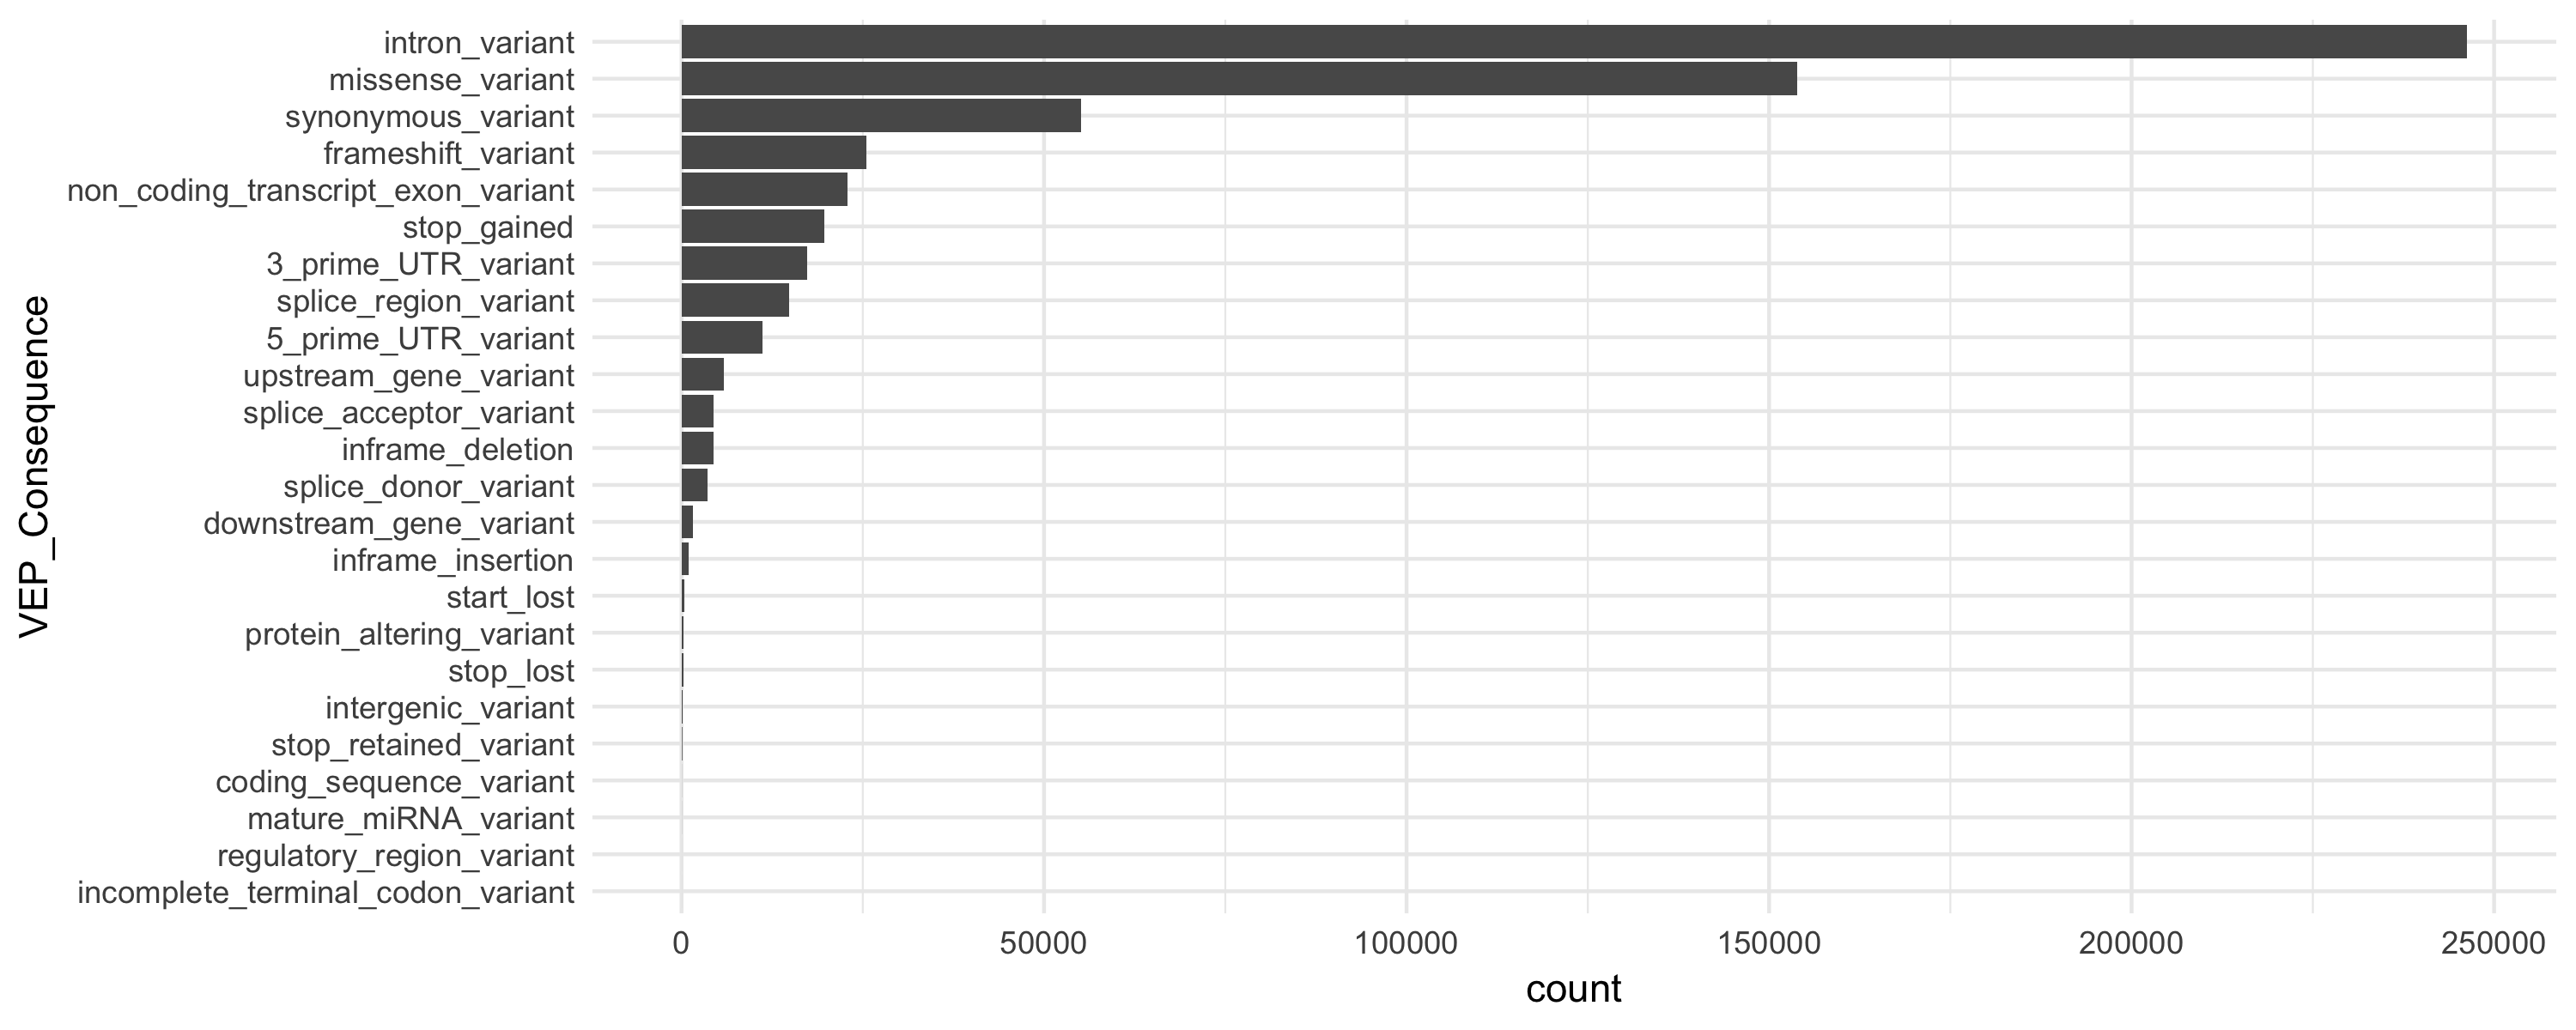

In [32]:
plot_histogram(impact, "VEP_Consequence", height = 4, flip = TRUE)

In [33]:
# [-375,418 rows] remove the non-interesting VEP_Consequence mutations
impact <- impact[impact$VEP_Consequence %in% c("missense_variant",
                                               "frameshift_variant",
                                               "stop_gained",
                                               "splice_acceptor_variant",
                                               "inframe_deletion",
                                               "splice_donor_variant",
                                               "inframe_insertion",
                                               "start_lost",
                                               "stop_lost"),]

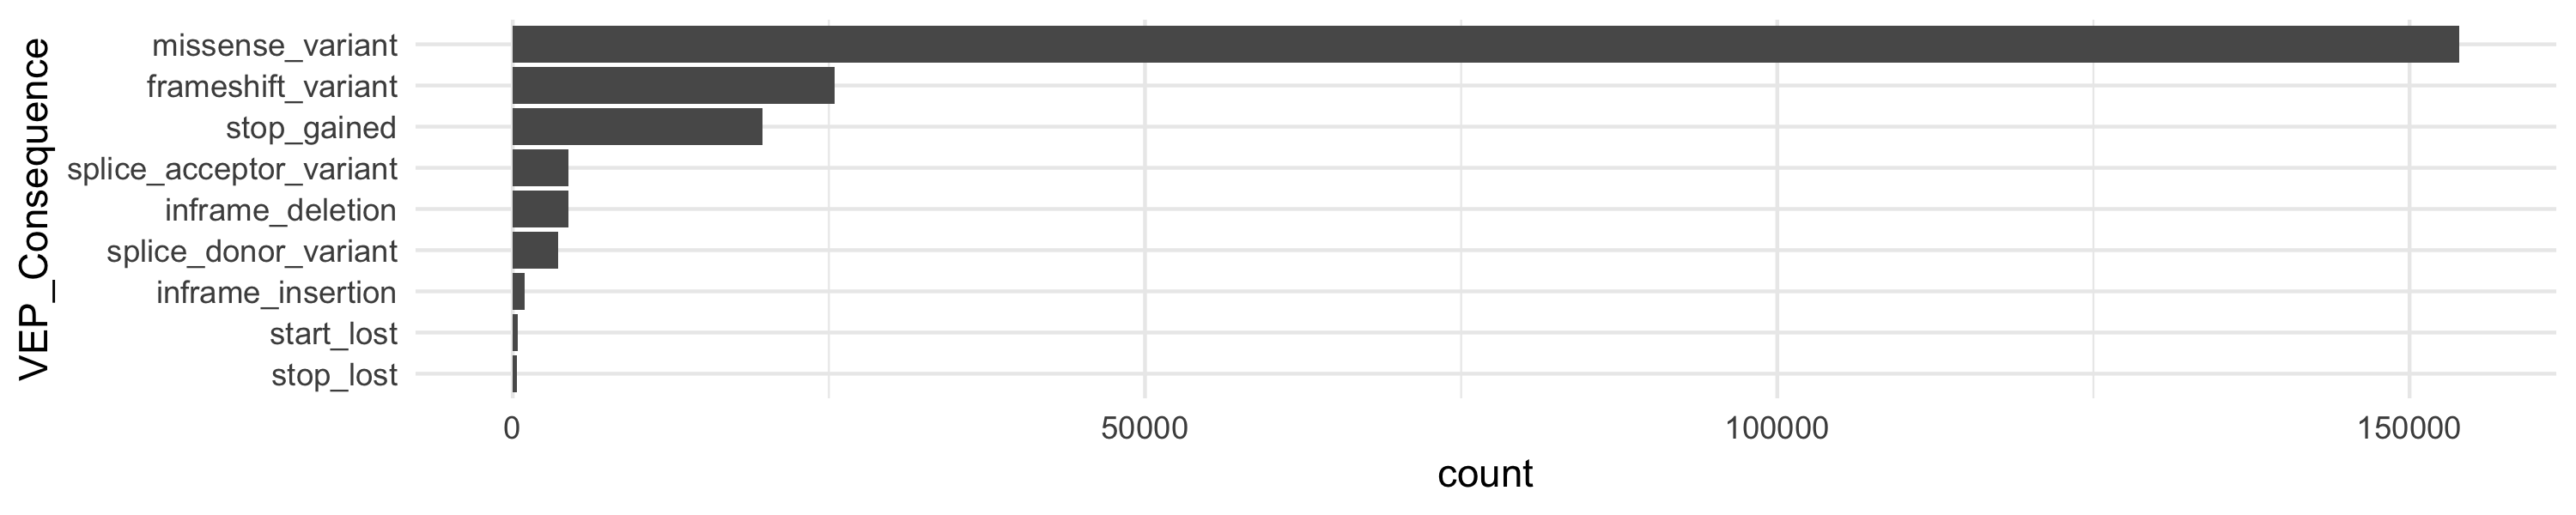

In [34]:
plot_histogram(impact, "VEP_Consequence", height = 2, flip = TRUE)

In [35]:
nrow(impact) # it was 588,547 before

[1] 213129

### [Remove] `confidence_class = UNKNOWN` or `confidence_class = OK_NOT_SO`

In [36]:
get_table(impact$confidence_class)

values,count,freq
AUTO_OK,187775,88.1%
UNLIKELY,13110,6.2%
MANUAL_OK,6748,3.2%
UNKNOWN,5464,2.6%
OK_NOT_SO,32,0%
-- total --,213129,100%


In [37]:
get_table(impact$Consequence[impact$confidence_class == "UNKNOWN"])
get_table(impact$VEP_Consequence[impact$confidence_class == "UNKNOWN"])

values,count,freq
intronic,2773,50.8%
exonic,1258,23%
synonymous_SNV,1024,18.7%
UTR3,167,3.1%
UTR5,118,2.2%
upstream,57,1%
Unknown,34,0.6%
stoploss_SNV,12,0.2%
splicing_noncanonical,11,0.2%
intergenic,4,0.1%


values,count,freq
missense_variant,4237,77.5%
frameshift_variant,421,7.7%
stop_gained,346,6.3%
splice_donor_variant,131,2.4%
splice_acceptor_variant,130,2.4%
inframe_deletion,77,1.4%
stop_lost,73,1.3%
start_lost,39,0.7%
inframe_insertion,10,0.2%
-- total --,5464,100%


In [38]:
# [-5,496 rows] remove rows having `confidence_class = UNKNOWN` or `confidence_class = OK_NOT_SO`
impact <- impact[! impact$confidence_class %in% c("UNKNOWN", "OK_NOT_SO"),]

### [Remove] `minor_contamination` > 0.01

In [39]:
print_count_and_proportion(nrow(impact[impact$minor_contamination > 0.01,]), nrow(impact))

[1] "9156 over 207633 (4.41%)"

In [40]:
# [-9,156 rows] remove the contaminated rows minor_contamination > 0.01
impact <- impact[impact$minor_contamination <= 0.01,]
# [-1 feature] remove the minor_contamination feature
impact["minor_contamination"] <- NULL

### [Remove] `n_depth` < 20

In [41]:
nrow(impact[impact$n_depth < 20,])

[1] 311

In [42]:
# [-311 rows] remove rows having n_depth < 20
impact <- impact[impact$n_depth >= 20,]

### [Remove] `t_alt_plus_count` + `t_alt_neg_count` != `t_alt_count`

In [43]:
nrow(impact[impact$t_alt_plus_count + impact$t_alt_neg_count != impact$t_alt_count,])

[1] 44

In [44]:
# [-44 rows] remove the rows having t_alt_plus_count + t_alt_neg_count != t_alt_count
impact <- impact[impact$t_alt_plus_count + impact$t_alt_neg_count == impact$t_alt_count,]

### [Create] new features: `sample_mut_key`, `patient_key`

In [45]:
# [+1 feature] create a sample mutation key feature to idenfity unique rows
impact$sample_mut_key <- paste(impact$Tumor_Sample_Barcode, impact$mut_key, sep = '_')

In [46]:
# [+1 feature] create a patient key feature to idenfity unique patient
impact$patient_key <- substr(impact$Tumor_Sample_Barcode, 1, 9)

### [Modify] wrong or synonymous `Hugo_Symbol`

Unfortunately there are some wrong/synonymous `Hugo_Symbol`. We use the [symbol checker tool](https://www.genenames.org/cgi-bin/symbol_checker) of the website HGNC (HUGO Gene Nomenclature Committee) to correct the errors, we give the result of `unique(impact$Hugo_Symbol)` to the symbol checker tool, and check which symbols are wrong/synonymous. Any incertitude was double ckecked with [OncoKB](http://oncokb.org/#/). Based on the results, the following 18 symbols were found to be unofficial:

| Old Hugo Symbol  | New Hugo symbol | HGNC reason     | Count |
| ---------------- | --------------- | --------------- | ----- |
| MLL3             | KMT2C           | Previous symbol | 1380  |
| PAK7             | PAK5            | Previous symbol | 924   |
| RFWD2            | COP1            | Previous symbol | 349   |
| MYCL1            | MYCL            | Previous symbol | 176   |
| MLL2             | KMT2D           | Previous symbol | 1948  |
| MLL              | KMT2A           | Previous symbol | 744   |
| FAM46C           | TENT5C          | Previous symbol | 231   |
| MRE11A           | MRE11           | Previous symbol | 313   |
| PARK2            | PRKN            | Previous symbol | 392   |
| FAM175A          | ABRAXAS1        | Previous symbol | 124   |
| TCEB1            | ELOC            | Previous symbol | 40    |
| WHSC1            | NSD2            | Previous symbol | 305   |
| WHSC1L1          | NSD3            | Previous symbol | 273   |
| FAM58A           | CCNQ            | Previous symbol | 104   |
| SETD8            | KMT5A           | Previous symbol | 106   |
| MLL4             | KMT2B           | Synonyms        | 92    |
| CDKN2Ap16INK4A   | CDKN2A          | Unmatched       | 1334  |
| CDKN2Ap14ARF     | CDKN2Ap14ARF    | Unmatched       | 865   |
*The symbols `TCF3`, `TRAF2`and `ERF` are marked as "Previous symbol" by HGNC but are still considered official by OncoKB, so we kept them.

We decided to rename every symbols that are classified as "Previous Symbol" and "Synonyms" (see next header). The processus applied to rename `CDKN2Ap16INK4A` and `CDKN2Ap14ARF` is detailed just after (see second header).

#### Renaming the "Previous Symbol" and "Synonyms"

In [47]:
old_Hugo_Symbol = c('MLL3', 'PAK7', 'RFWD2', 'MYCL1', 'MLL2', 'MLL', 'FAM46C', 'MRE11A', 'PARK2', 'FAM175A',
                    'TCEB1', 'WHSC1', 'WHSC1L1', 'FAM58A', 'SETD8', 'MLL4')
new_Hugo_Symbol = c('KMT2C', 'PAK5', 'COP1', 'MYCL', 'KMT2D', 'KMT2A', 'TENT5C', 'MRE11', 'PRKN', 'ABRAXAS1',
                    'ELOC', 'NSD2', 'NSD3', 'CCNQ', 'KMT5A', 'KMT2B')

has_old_symbol <- which(impact$Hugo_Symbol %in% old_Hugo_Symbol)
length(impact$Hugo_Symbol[has_old_symbol]) # 5696 previous/synonyms symbols!

[1] 5696

In [48]:
dd <- head(unique(impact$Hugo_Symbol[has_old_symbol]), 10)
dd <- data.frame(dd, new_Hugo_Symbol[match(dd, old_Hugo_Symbol)], row.names = NULL)
colnames(dd) <- c("old", "new")
dd

old,new
MLL3,KMT2C
MYCL1,MYCL
MLL2,KMT2D
PAK7,PAK5
MLL,KMT2A
FAM46C,TENT5C
MRE11A,MRE11
PARK2,PRKN
FAM175A,ABRAXAS1
RFWD2,COP1


In [49]:
# [~5696 rows] modify wrong/synonymous Hugo_Symbol
impact$Hugo_Symbol[has_old_symbol] <- new_Hugo_Symbol[match(impact$Hugo_Symbol[has_old_symbol], old_Hugo_Symbol)]

#### Renaming`CDKN2Ap16INK4A` and `CDKN2Ap14ARF`

The symbole checker tool detected two symbols as "Unmatched", `CDKN2Ap16INK4A` and `CDKN2Ap14ARF`. These two symbols correspond to two different reading frame of the gene `CDKN2A`:
* `CDKN2Ap16INK4A` is the "classic" reading frame for `CDKN2A`, the one used by OncoKB (see [OncoKB CDKN2A](http://oncokb.org/#/gene/CDKN2A))  
   → RefSeq. NM_000077.4  
   → [Homo sapiens cyclin dependent kinase inhibitor 2A (CDKN2A), transcript variant 1, mRNA](https://www.ncbi.nlm.nih.gov/nuccore/NM_000077.4)  
   → [Wikipedia article p16](https://en.wikipedia.org/wiki/P16)
* `CDKN2Ap14ARF` is an Alternative Reading Frame (ARF, as said in its name) for `CDKN2A`, not used by OncoKB  
  → RefSeq. NM_058195.3  
  → [Homo sapiens cyclin dependent kinase inhibitor 2A (CDKN2A), transcript variant 4, mRNA](https://www.ncbi.nlm.nih.gov/nuccore/NM_058195)  
  → [Wikipedia article p14arf](https://en.wikipedia.org/wiki/P14arf)
  
We decided to replace every `CDKN2Ap16INK4A` by `CDKN2A`. We also decided to keep the name `CDKN2Ap14ARF` for the alternative reading frame, except when the mutation was already included, for this tumor sample, in the classic reading frame (in `CDKN2Ap16INK4A`), then we delete the mutation because it has already been read.

In [50]:
nrow(impact[impact$Hugo_Symbol == "CDKN2Ap16INK4A",])

[1] 1270

In [51]:
# [~1270 rows] Hugo_Symbol = CDKN2Ap16INK4A -> CDKN2A
impact$Hugo_Symbol[impact$Hugo_Symbol == "CDKN2Ap16INK4A"] <- "CDKN2A"

In [52]:
nrow(impact[impact$Hugo_Symbol == "CDKN2Ap14ARF",]) # mutations having the alternative reading data frame
dd <- impact %>% group_by(Tumor_Sample_Barcode) %>% summarise(has_both_reading_frame = sum(Hugo_Symbol == "CDKN2Ap14ARF") > 0 & sum(Hugo_Symbol == "CDKN2A") > 0) %>% filter(has_both_reading_frame)
nrow(impact[impact$Hugo_Symbol == "CDKN2Ap14ARF" & impact$Tumor_Sample_Barcode %in% dd$Tumor_Sample_Barcode,]) # mutations having the alternative reading data frame and the classic reading data frame for this tumor sample

[1] 758

[1] 713

We delete from `impact` the rows that are `CDKN2Ap14ARF` and have already been read in the classic reading frame:

In [53]:
# [-713 rows] Hugo_Symbol = CDKN2Ap14ARF and CDKN2A in the tumor sample
impact <- impact[! (impact$Hugo_Symbol == "CDKN2Ap14ARF" & impact$Tumor_Sample_Barcode %in% dd$Tumor_Sample_Barcode),]

### [Remove] the duplicated `sample_mut_key` rows

Some tumor sample have twice the same mutation, we keep the one with the minimal depth, and when the depth are equal the one with the minimum vaf.

In [54]:
impact_redundant <- impact %>% group_by(sample_mut_key) %>% filter(n() >= 2)
nrow(impact_redundant)

[1] 96

In [55]:
impact_redundant %>% group_by(sample_mut_key) %>% filter(n() > 3)

Hugo_Symbol,Chromosome,Start_Position,End_Position,Consequence,Variant_Type,Reference_Allele,Tumor_Seq_Allele2,Tumor_Sample_Barcode,cDNA_change,HGVSp_Short,t_depth,t_vaf,t_alt_count,n_depth,n_vaf,n_alt_count,t_ref_plus_count,t_ref_neg_count,t_alt_plus_count,t_alt_neg_count,occurence_in_normals,confidence_class,sample_coverage,mut_key,VAG_VT,VAG_GENE,VAG_cDNA_CHANGE,VAG_PROTEIN_CHANGE,VAG_EFFECT,VEP_Consequence,VEP_SYMBOL,VEP_HGVSc,VEP_HGVSp,VEP_Amino_acids,VEP_VARIANT_CLASS,VEP_BIOTYPE,VEP_IMPACT,VEP_CLIN_SIG,VEP_AF,VEP_MAX_AF,VEP_MAX_AF_POPS,VEP_gnomAD_AF,VEP_SIFT,VEP_PolyPhen,VEP_COSMIC_CNT,sample_mut_key,patient_key


In [56]:
head(impact_redundant[order(impact_redundant$sample_mut_key),], 10)

Hugo_Symbol,Chromosome,Start_Position,End_Position,Consequence,Variant_Type,Reference_Allele,Tumor_Seq_Allele2,Tumor_Sample_Barcode,cDNA_change,HGVSp_Short,t_depth,t_vaf,t_alt_count,n_depth,n_vaf,n_alt_count,t_ref_plus_count,t_ref_neg_count,t_alt_plus_count,t_alt_neg_count,occurence_in_normals,confidence_class,sample_coverage,mut_key,VAG_VT,VAG_GENE,VAG_cDNA_CHANGE,VAG_PROTEIN_CHANGE,VAG_EFFECT,VEP_Consequence,VEP_SYMBOL,VEP_HGVSc,VEP_HGVSp,VEP_Amino_acids,VEP_VARIANT_CLASS,VEP_BIOTYPE,VEP_IMPACT,VEP_CLIN_SIG,VEP_AF,VEP_MAX_AF,VEP_MAX_AF_POPS,VEP_gnomAD_AF,VEP_SIFT,VEP_PolyPhen,VEP_COSMIC_CNT,sample_mut_key,patient_key
BRCA1,17,41234541,41234541,nonsynonymous_SNV,SNP,C,T,P-0000096-T01-IM3,c.4237G>A,p.E1413K,48,0.22917,11,103,0,0,15,22,5,6,0,UNLIKELY,1084,17_41234541_C_T,Sub,BRCA1,c.4237G>A,p.E1413K,non_synonymous_codon,missense_variant,BRCA1,ENST00000471181.2:c.4237G>A,ENSP00000418960.2:p.Glu1413Lys,E/K,SNV,protein_coding,MODERATE,NA,NA,NA,NA,NA,tolerated(0.41),benign(0.138),NA,P-0000096-T01-IM3_17_41234541_C_T,P-0000096
BRCA1,17,41234541,41234541,nonsynonymous_SNV,SNP,C,T,P-0000096-T01-IM3,c.4237G>A,p.E1413K,1061,0.27333,290,346,0,0,358,413,128,162,0,AUTO_OK,1084,17_41234541_C_T,Sub,BRCA1,c.4237G>A,p.E1413K,non_synonymous_codon,missense_variant,BRCA1,ENST00000471181.2:c.4237G>A,ENSP00000418960.2:p.Glu1413Lys,E/K,SNV,protein_coding,MODERATE,NA,NA,NA,NA,NA,tolerated(0.41),benign(0.138),NA,P-0000096-T01-IM3_17_41234541_C_T,P-0000096
JAK3,19,17942137,17942137,nonsynonymous_SNV,SNP,C,T,P-0000096-T01-IM3,c.2878G>A,p.E960K,50,0.36000,18,90,0,0,16,16,6,12,0,UNLIKELY,1084,19_17942137_C_T,Sub,JAK3,c.2878G>A,p.E960K,non_synonymous_codon,missense_variant,JAK3,ENST00000458235.1:c.2878G>A,ENSP00000391676.1:p.Glu960Lys,E/K,SNV,protein_coding,MODERATE,NA,NA,NA,NA,NA,deleterious(0),benign(0.372),NA,P-0000096-T01-IM3_19_17942137_C_T,P-0000096
JAK3,19,17942137,17942137,nonsynonymous_SNV,SNP,C,T,P-0000096-T01-IM3,c.2878G>A,p.E960K,698,0.44842,313,331,0,0,163,221,125,188,0,AUTO_OK,1084,19_17942137_C_T,Sub,JAK3,c.2878G>A,p.E960K,non_synonymous_codon,missense_variant,JAK3,ENST00000458235.1:c.2878G>A,ENSP00000391676.1:p.Glu960Lys,E/K,SNV,protein_coding,MODERATE,NA,NA,NA,NA,NA,deleterious(0),benign(0.372),NA,P-0000096-T01-IM3_19_17942137_C_T,P-0000096
PTPRS,19,5246019,5246019,nonsynonymous_SNV,SNP,C,G,P-0000096-T01-IM3,c.756G>C,p.M252I,70,0.14286,10,64,0,0,29,31,4,6,0,UNLIKELY,1084,19_5246019_C_G,Sub,PTPRS,c.756G>C,p.M252I,non_synonymous_codon,missense_variant,PTPRS,ENST00000357368.4:c.756G>C,ENSP00000349932.4:p.Met252Ile,M/I,SNV,protein_coding,MODERATE,NA,NA,NA,NA,NA,tolerated(0.07),benign(0),NA,P-0000096-T01-IM3_19_5246019_C_G,P-0000096
PTPRS,19,5246019,5246019,nonsynonymous_SNV,SNP,C,G,P-0000096-T01-IM3,c.756G>C,p.M252I,563,0.18295,103,227,0,0,154,306,40,63,0,AUTO_OK,1084,19_5246019_C_G,Sub,PTPRS,c.756G>C,p.M252I,non_synonymous_codon,missense_variant,PTPRS,ENST00000357368.4:c.756G>C,ENSP00000349932.4:p.Met252Ile,M/I,SNV,protein_coding,MODERATE,NA,NA,NA,NA,NA,tolerated(0.07),benign(0),NA,P-0000096-T01-IM3_19_5246019_C_G,P-0000096
RHOA,3,49412884,49412884,nonsynonymous_SNV,SNP,C,T,P-0000096-T01-IM3,c.139G>A,p.E47K,58,0.39655,23,100,0,0,20,15,12,11,0,UNLIKELY,1084,3_49412884_C_T,Sub,RHOA,c.139G>A,p.E47K,non_synonymous_codon,missense_variant,RHOA,ENST00000418115.1:c.139G>A,ENSP00000400175.1:p.Glu47Lys,E/K,SNV,protein_coding,MODERATE,NA,NA,NA,NA,NA,deleterious(0.04),possibly_damaging(0.903),NA,P-0000096-T01-IM3_3_49412884_C_T,P-0000096
RHOA,3,49412884,49412884,nonsynonymous_SNV,SNP,C,T,P-0000096-T01-IM3,c.139G>A,p.E47K,1159,0.41501,481,399,0,0,348,329,275,206,0,AUTO_OK,1084,3_49412884_C_T,Sub,RHOA,c.139G>A,p.E47K,non_synonymous_codon,missense_variant,RHOA,ENST00000418115.1:c.139G>A,ENSP00000400175.1:p.Glu47Lys,E/K,SNV,protein_coding,MODERATE,NA,NA,NA,NA,NA,deleterious(0.04),possibly_damaging(0.903),NA,P-0000096-T01-IM3_3_49412884_C_T,P-0000096
FGFR3,4,1803568,1803568,nonsynonymous_SNV,SNP,C,G,P-0000096-T01-IM3,c.746C>G,p.S249C,104,0.75962,79,50,0,0,10,

In [57]:
impact_redundant_to_delete <- impact_redundant %>% group_by(sample_mut_key) %>% filter(t_depth == min(t_depth)) %>% filter(t_vaf == min(t_vaf))
nrow(impact_redundant_to_delete)

[1] 48

In [58]:
# [-48 rows] duplicated mutation for the same sample_mut_key
impact <- impact[! (impact$sample_mut_key %in% impact_redundant_to_delete$sample_mut_key &
                    impact$t_depth %in% impact_redundant_to_delete$t_depth &
                    impact$t_vaf %in% impact_redundant_to_delete$t_vaf),]

### ??Remove hypermutated patients

In [59]:
tumor_summary <- impact %>% group_by(Tumor_Sample_Barcode) %>% summarise(number_of_mutations = n())
head(tumor_summary)

Tumor_Sample_Barcode,number_of_mutations
None-T01-IM6,6
P-0000012-T02-IM3,1
P-0000012-T03-IM3,30
P-0000023-T01-IM3,5
P-0000024-T01-IM3,6
P-0000025-T01-IM3,1


In [60]:
nrow(tumor_summary)
summary(tumor_summary$number_of_mutations)
nrow(tumor_summary[tumor_summary$number_of_mutations >= 100,])

[1] 22747

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   3.000   4.000   8.676   8.000 527.000 

[1] 141

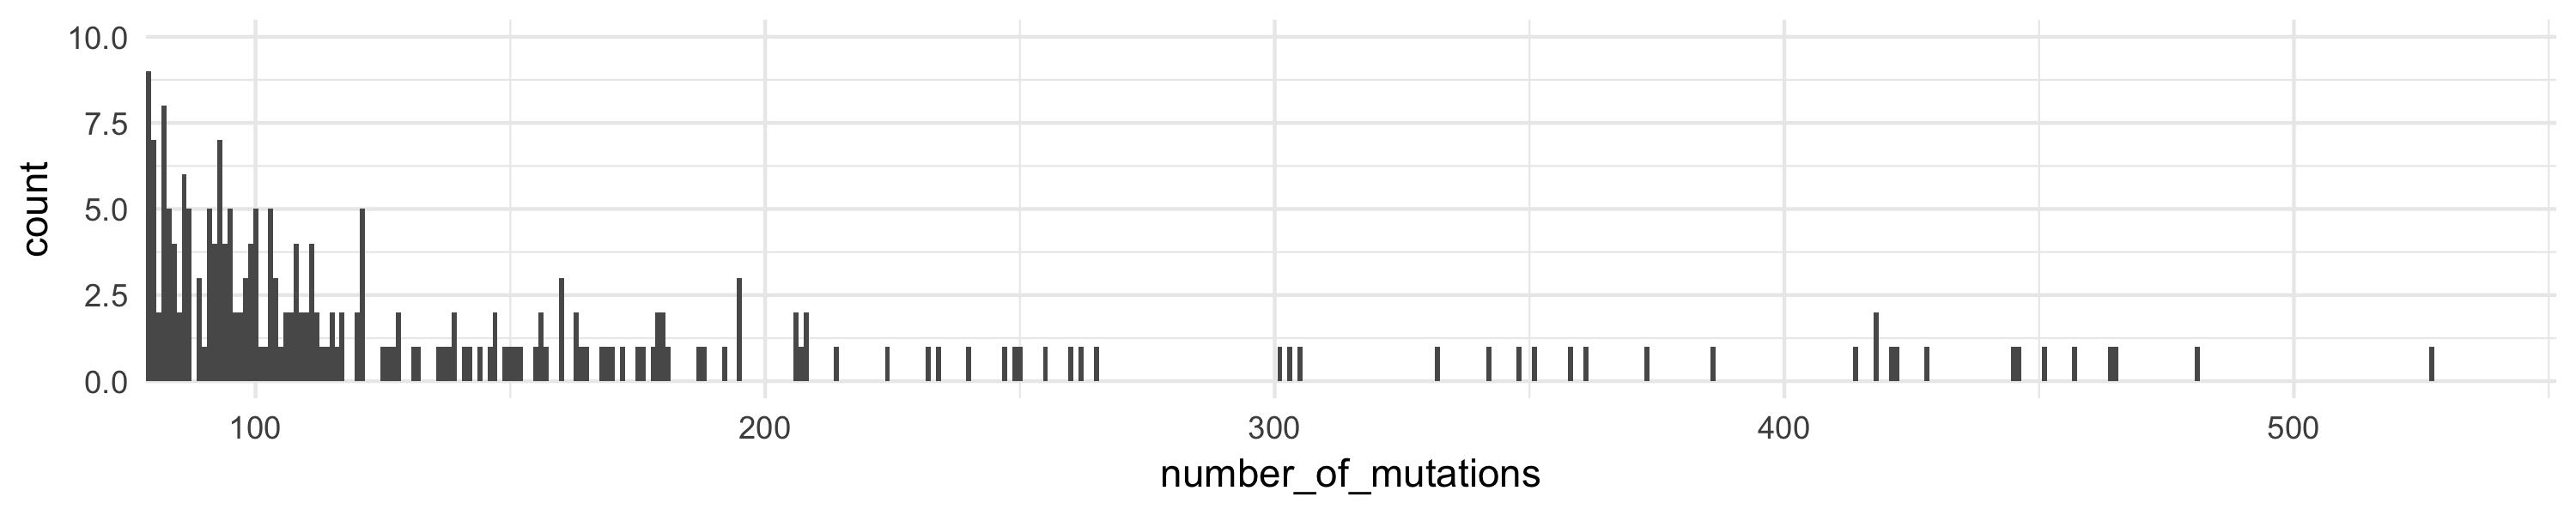

In [61]:
notebook_plot_size(10, 2)
ggplot(tumor_summary) + geom_histogram(aes(number_of_mutations), binwidth = 1) + coord_cartesian(xlim = c(100, 530), ylim = c(0, 10))

In [62]:
nrow(impact)
ncol(impact)

[1] 197361

[1] 48

### [Remove] DNP and TNP counted twice

In [63]:
overlapping_risk_dnp_or_tnp <- as.data.frame(impact %>% group_by(Tumor_Sample_Barcode, Hugo_Symbol) %>%
                                             filter(n() > 1 &
                                                    "SNP" %in% Variant_Type &
                                                    ("DNP" %in% Variant_Type |
                                                     "TNP" %in% Variant_Type)))

nrow(overlapping_risk_dnp_or_tnp)

[1] 6776

In [64]:
find_overlapping_dnp_or_tnp <- function(data, tsb, chr, start) {
    result <- data %>% filter(Tumor_Sample_Barcode == tsb &
                              Chromosome == chr &
                              ((Variant_Type == "DNP" & (Start_Position == start | Start_Position == start - 1) |
                               (Variant_Type == "TNP" & (Start_Position == start | Start_Position == start - 1 | Start_Position == start - 2)))))

    if (nrow(result) == 0)
        return ("no")
    else
        return (toString(paste(nrow(result), result$Start_Position, result$Reference_Allele, result$Tumor_Seq_Allele2)))
}

In [65]:
overlapping_dnp_or_tnp <- overlapping_risk_dnp_or_tnp %>% filter(Variant_Type == "SNP") %>%
                                                          group_by(sample_mut_key) %>%
                                                          mutate(overlap = find_overlapping_dnp_or_tnp(overlapping_risk_dnp_or_tnp, Tumor_Sample_Barcode, Chromosome, Start_Position)) %>%
                                                          filter(overlap != "no") %>%
                                                          select(sample_mut_key, Hugo_Symbol, Start_Position, Variant_Type, Reference_Allele, Tumor_Seq_Allele2, Tumor_Sample_Barcode, overlap)

nrow(overlapping_dnp_or_tnp)

[1] 3151

In [66]:
tail(overlapping_dnp_or_tnp)

sample_mut_key,Hugo_Symbol,Start_Position,Variant_Type,Reference_Allele,Tumor_Seq_Allele2,Tumor_Sample_Barcode,overlap
P-0029220-T01-IM6_7_140453136_A_T,BRAF,140453136,SNP,A,T,P-0029220-T01-IM6,1 140453135 CA TT
P-0029242-T01-IM6_5_149499072_C_T,PDGFRB,149499072,SNP,C,T,P-0029242-T01-IM6,1 149499071 CC TT
P-0012045-T02-IM6_3_52678766_C_A,PBRM1,52678766,SNP,C,A,P-0012045-T02-IM6,1 52678766 CC AA
P-0012045-T02-IM6_3_52678767_C_A,PBRM1,52678767,SNP,C,A,P-0012045-T02-IM6,1 52678766 CC AA
P-0004933-T02-IM6_2_27009092_C_T,CENPA,27009092,SNP,C,T,P-0004933-T02-IM6,1 27009090 AGC TGT
P-0004933-T02-IM6_7_140453145_A_G,BRAF,140453145,SNP,A,G,P-0004933-T02-IM6,1 140453145 AG GA


In [67]:
# [-3151 rows] SNV found as DNP or TNP
impact <- impact[! impact$sample_mut_key %in% overlapping_dnp_or_tnp$sample_mut_key,]

## Process raw features

### [Modify] deal with `NA` values

In [68]:
count_na <- function(data) {
    return (sum(is.na(data)))
}

In [69]:
replace_na <- function(data, feature_name, replace_value){
    data[is.na(data[,feature_name]), feature_name] <- replace_value
    
    return (data)
}

In [70]:
for (c in colnames(impact))
    print(sprintf("%20s: %d", c, count_na(impact[,c])))

[1] "         Hugo_Symbol: 0"
[1] "          Chromosome: 0"
[1] "      Start_Position: 0"
[1] "        End_Position: 0"
[1] "         Consequence: 0"
[1] "        Variant_Type: 0"
[1] "    Reference_Allele: 0"
[1] "   Tumor_Seq_Allele2: 0"
[1] "Tumor_Sample_Barcode: 0"
[1] "         cDNA_change: 0"
[1] "         HGVSp_Short: 0"
[1] "             t_depth: 0"
[1] "               t_vaf: 0"
[1] "         t_alt_count: 0"
[1] "             n_depth: 0"
[1] "               n_vaf: 0"
[1] "         n_alt_count: 0"
[1] "    t_ref_plus_count: 0"
[1] "     t_ref_neg_count: 0"
[1] "    t_alt_plus_count: 0"
[1] "     t_alt_neg_count: 0"
[1] "occurence_in_normals: 0"
[1] "    confidence_class: 0"
[1] "     sample_coverage: 0"
[1] "             mut_key: 0"
[1] "              VAG_VT: 0"
[1] "            VAG_GENE: 113"
[1] "     VAG_cDNA_CHANGE: 167"
[1] "  VAG_PROTEIN_CHANGE: 167"
[1] "          VAG_EFFECT: 113"
[1] "     VEP_Consequence: 0"
[1] "          VEP_SYMBOL: 0"
[1] "           VEP_HGVSc: 5"
[1

### VAG

In [71]:
for (c in vag_colnames)
    print(sprintf("%17s: %d", c, count_na(impact[,c])))

[1] "           VAG_VT: 0"
[1] "         VAG_GENE: 113"
[1] "  VAG_cDNA_CHANGE: 167"
[1] "VAG_PROTEIN_CHANGE: 167"
[1] "       VAG_EFFECT: 113"


In [72]:
impact <- replace_na(impact, "VAG_GENE"          , "unknown")
impact <- replace_na(impact, "VAG_cDNA_CHANGE"   , "unknown")
impact <- replace_na(impact, "VAG_PROTEIN_CHANGE", "unknown")
impact <- replace_na(impact, "VAG_EFFECT"        , "unknown")

#### VEP

In [73]:
for (c in vep_colnames)
    print(sprintf("%17s: %d", c, count_na(impact[,c])))

[1] "  VEP_Consequence: 0"
[1] "       VEP_SYMBOL: 0"
[1] "        VEP_HGVSc: 5"
[1] "        VEP_HGVSp: 7175"
[1] "  VEP_Amino_acids: 7158"
[1] "VEP_VARIANT_CLASS: 0"
[1] "      VEP_BIOTYPE: 0"


In [74]:
impact[is.na(impact$VEP_HGVSc),]

,Hugo_Symbol,Chromosome,Start_Position,End_Position,Consequence,Variant_Type,Reference_Allele,Tumor_Seq_Allele2,Tumor_Sample_Barcode,cDNA_change,HGVSp_Short,t_depth,t_vaf,t_alt_count,n_depth,n_vaf,n_alt_count,t_ref_plus_count,t_ref_neg_count,t_alt_plus_count,t_alt_neg_count,occurence_in_normals,confidence_class,sample_coverage,mut_key,VAG_VT,VAG_GENE,VAG_cDNA_CHANGE,VAG_PROTEIN_CHANGE,VAG_EFFECT,VEP_Consequence,VEP_SYMBOL,VEP_HGVSc,VEP_HGVSp,VEP_Amino_acids,VEP_VARIANT_CLASS,VEP_BIOTYPE,VEP_IMPACT,VEP_CLIN_SIG,VEP_AF,VEP_MAX_AF,VEP_MAX_AF_POPS,VEP_gnomAD_AF,VEP_SIFT,VEP_PolyPhen,VEP_COSMIC_CNT,sample_mut_key,patient_key
92105,CDKN2A,9,21974658,21974895,splicing,DEL,CTGCAGACCCTCTACCCACCTGGATCGGCCTCCGACCGTAACTATTCGGTGCGTTGGGCAGCGCCCCCGCCTCCAGCAGCGCCCGCACCTCCTCTACCCGACCCCGGGCCGCGGCCGTGGCCAGCCAGTCAGCCGAAGGCTCCATGCTGCTCCCCGCCGCCGGCTCCATGCTGCTCCCCGCCGCCCGCTGCCTGCTCTCCCCCTCTCCGCAGCCGCCGAGCGCACGCGGTCCGCCCCA,-,P-0006266-T01-IM5,c.150+20_-69del,,536,0.20522,110,427,0.0000,0,200,226,40,70,0,AUTO_OK,666,9_21974658_CTGCAGACCCTCTACCCACCTGGATCGGCCTCCGACCGTAACTATTCGGTGCGTTGGGCAGCGCCCCCGCCTCCAGCAGCGCCCGCACCTCCTCTACCCGACCCCGGGCCGCGGCCGTGGCCAGCCAGTCAGCCGAAGGCTCCATGCTGCTCCCCGCCGCCGGCTCCATGCTGCTCCCCGCCGCCCGCTGCCTGCTCTCCCCCTCTCCGCAGCCGCCGAGCGCACGCGGTCCGCCCCA_-,Del,CDKN2A,c.1_150+19del169,p.?,initiator_codon_change,splice_donor_variant,CDKN2A,NA,NA,NA,deletion,protein_coding,HIGH,NA,NA,NA,NA,NA,NA,NA,NA,P-0006266-T01-IM5_9_21974658_CTGCAGACCCTCTACCCACCTGGATCGGCCTCCGACCGTAACTATTCGGTGCGTTGGGCAGCGCCCCCGCCTCCAGCAGCGCCCGCACCTCCTCTACCCGACCCCGGGCCGCGGCCGTGGCCAGCCAGTCAGCCGAAGGCTCCATGCTGCTCCCCGCCGCCGGCTCCATGCTGCTCCCCGCCGCCCGCTGCCTGCTCTCCCCCTCTCCGCAGCCGCCGAGCGCACGCGGTCCGCCCCA_-,P-0006266
286621,MAPK3,16,30134458,30135078,nonsynonymous_SNV,DEL,GGACCCCCGGGCCGACCCCCTCGGTTCTACGGGGCTCCCCGCCCCCGCCCCCCTGAGCCGCCGCCGCCGCCATCTCCACTCCTCCCCTCCCACCGCCCTCCTCCCCACGGCGGCCCCGCCCGAGGCCCCGCCCCTTCCCGCCTGCCTGTCACCCGCAGGGCCGCGCGCGCCAGGCCCCGCCCTTGCCCCGGCCCCGCGTGGGCCTGGAGCTGTCACGTGACCCGCCCCGCGCGCGCCCGCCCTTCTTGCCCCAGGTTCGGGGGCCATGGGTCCCTGCGGGCTCCGCGGCCTCCAGGTCACCGGGAGGTTCGGCAGCGCCGCCTCGGAGACTGTCCTCACCCTCCCCTCGATGGCGAAGCGGCCAGGGCGTGACCTACCAGAGCCACCCAGCCAATGTATGCGGCAGCCCACCAGAACCTGGGCCCGGGATCACCCTAGGTTAAAAATAATGTTCTAATAAATGGATCAAATTTTACAGATGGAGAATCTGAGAGTTAGGTTTACTAACTTGGGTAAGGTCACTAGTAGTGACAGCTGAGACTCAAAATGGTGTCTTCTGACACAGAGACTCTTTCTAATTCCATGCCTCTCAGAGTCCTAGACTGTTTTTATTTTATTATA,-,P-0015734-T01-IM6,,,971,0.45623,443,713,0.0014,1,222,308,184,259,0;0,UNLIKELY,626,16_30134458_GGACCCCCGGGCCGACCCCCTCGGTTCTACGGGGCTCCCCGCCCCCGCCCCCCTGAGCCGCCGCCGCCGCCATCTCCACTCCTCCCCTCCCACCGCCCTCCTCCCCACGGCGGCCCCGCCCGAGGCCCCGCCCCTTCCCGCCTGCCTGTCACCCGCAGGGCCGCGCGCGCCAGGCCCCGCCCTTGCCCCGGCCCCGCGTGGGCCTGGAGCTGTCACGTGACCCGCCCCGCGCGCGCCCGCCCTTCTTGCCCCAGGTTCGGGGGCCATGGGTCCCTGCGGGCTCCGCGGCCTCCAGGTCACCGGGAGGTTCGGCAGCGCCGCCTCGGAGACTGTCCTCACCCTCCCCTCGATGGCGAAGCGGCCAGGGCGTGACCTACCAGAGCCACCCAGCCAATGTATGCGGCAGCCCACCAGAACCTGGGCCCGGGATCACCCTAGGTTAAAAATAATGTTCTAATAAATGGATCAAATTTTACAGATGGAGAATCTGAGAGTTAGGTTTACTAACTTGGGTAAGGTCACTAGTAGTGACAGCTGAGACTCAAAATGGTGTCTTCTGACACAGAGACTCTTTCTAATTCCATGCCTCTCAGAGTCCTAGACTGTTTTTATTTTATTATA_-,Del,MAPK3,c.1_73del73,p.?,initiator_codon_change,splice_donor_variant,MAPK3,NA,NA,NA,deletion,protein_coding,HIGH,NA,NA,NA,NA,NA,NA,NA,NA,P-0015734-T01-IM6_16_30134458_GGACCCCCGGGCCGACCCCCTCGGTTCTACGGGGCTCCCCGCCCCCGCCCCCCTGAGCCGCCGCCGCCGCCATCTCCACTCCTCCCCTCCCACCGCCCTCCTCCCCACGGCGGCCCCGCCCGAGGCCCCGCCCCTTCCCGCCTGCCTGTCACCCGCAGGGCCGCGCGCGCCAGGCCCCGCCCTTGCCCCGGCCCCGCGTGGGCCTGGAGCTGTCACGTGACCCGCCCCGCGCGCGCCCGCCCTTCTTGCCCCAGGTTCGGGGGCCATGGGTCCCTGCGGGCTCCGCGGCCTCCAGGTCACCGGGAGGTTCGGCAGCGCCGCCTCGGAGACTGTCCTCACCCTCCCCTCGATGGCGAAGCGGCCAGGGCGTGACCTACCAGAGCCACCCAGCCAATGTATGCGGCAGCCCACCAGAACCTGGGCCCGGGATCACCCTAGGTTAAAAATAATGTTCTAATAAATGGATCAAATTTTACAGATGGAGAATCTGAGAGTTAGGTTTACTAACTTGGGTAAGGTCACTAGTAGTGACAGCTGAGACTCAAAATGGTGTCTTCTGACACAGAGACTCTTTCTAATTCCATGCCTCTCAGAGTCCTAGACTGTTTTTATTTTATTATA_-,P-0015734
287992,SMAD3,15,67457371,67457373,nonframeshift_deletion,DEL,GAA,-,P-0002095-T02-IM6,c.349_351delAAG,p.K117del,1175,

7280 mutations have `VEP_HGVSp` = `NA`, almost all of them being splicing mutations:

In [75]:
get_table(impact$VEP_Consequence[is.na(impact$VEP_HGVSp)])

values,count,freq
splice_acceptor_variant,3838,53.5%
splice_donor_variant,3175,44.3%
frameshift_variant,87,1.2%
stop_lost,41,0.6%
start_lost,20,0.3%
inframe_insertion,6,0.1%
inframe_deletion,5,0.1%
stop_gained,3,0%
-- total --,7175,100%


7280 mutations have `VEP_Amino_acids` = `NA`, most of them being the one having `VEP_HGVSp = NA`:

In [76]:
count_na(impact$VEP_Amino_acids)
table(impact$mut_key[is.na(impact$VEP_Amino_acids)] %in% impact$mut_key[is.na(impact$VEP_HGVSp)])

[1] 7158


FALSE  TRUE 
   85  7073 

In [77]:
get_table(impact$VEP_Consequence[is.na(impact$VEP_Amino_acids) & ! is.na(impact$VEP_HGVSp)])

values,count,freq
splice_acceptor_variant,85,100%
-- total --,85,100%


In [78]:
impact <- replace_na(impact, "VEP_HGVSc"      , "unknown")
impact <- replace_na(impact, "VEP_HGVSp"      , "unknown")
impact <- replace_na(impact, "VEP_Amino_acids", "unknown")

#### VEP additional

In [79]:
for (c in vep_add_colnames)
    print(sprintf("%17s: %d", c, count_na(impact[,c])))

[1] "       VEP_IMPACT: 0"
[1] "     VEP_CLIN_SIG: 164735"
[1] "           VEP_AF: 188059"
[1] "       VEP_MAX_AF: 159955"
[1] "  VEP_MAX_AF_POPS: 154967"
[1] "    VEP_gnomAD_AF: 155361"
[1] "         VEP_SIFT: 55801"
[1] "     VEP_PolyPhen: 54976"
[1] "   VEP_COSMIC_CNT: 130629"


`NA` values might correspond to not found, we replace them by `"unknown"` or a null allele value for the numeric variables.

In [80]:
impact <- replace_na(impact, "VEP_CLIN_SIG"   , "unknown")
impact <- replace_na(impact, "VEP_AF"         , 0.0)
impact <- replace_na(impact, "VEP_MAX_AF"     , 0.0)
impact <- replace_na(impact, "VEP_MAX_AF_POPS", "unknown")
impact <- replace_na(impact, "VEP_gnomAD_AF"  , 0.0)
impact <- replace_na(impact, "VEP_SIFT"       , "unknown")
impact <- replace_na(impact, "VEP_PolyPhen"   , "unknown")
impact <- replace_na(impact, "VEP_COSMIC_CNT" , "unknown")

## [Modify] `occurence_in_normals` -> `frequency_in_normals`

In [81]:
dd <- head(unique(impact$occurence_in_normals), 10)
dd[dd == '0'] <- "0;0"
dd <- data.frame(dd, sapply(dd, function(s) as.double(strsplit(s, split = ';')[[1]][2])), row.names = NULL)
colnames(dd) <- c("old", "new")
dd

old,new
0;0,0.000
0;0,0.000
1;0.026,0.026
6;0.158,0.158
3;0.079,0.079
4;0.105,0.105
7;0.184,0.184
2;0.051,0.051
6;0.154,0.154
3;0.077,0.077


In [82]:
# [~ every rows] occurence_in_normals -> frequency_in_normals
impact$occurence_in_normals[impact$occurence_in_normals == '0'] <- "0;0"
impact$frequency_in_normals <- sapply(impact$occurence_in_normals,
                                      function(s) as.double(strsplit(s, split = ';')[[1]][2]))
impact$occurence_in_normals <- NULL

### [Modify] `VEP_HGVSc`

In [83]:
dd <- head(impact$VEP_HGVSc, 10)
dd <- data.frame(dd, sapply(dd, function(x) strsplit(x, ':')[[1]][2]), row.names = NULL)
colnames(dd) <- c("old", "new")
dd

old,new
ENST00000269305.4:c.766A>C,c.766A>C
ENST00000262741.5:c.894C>G,c.894C>G
ENST00000350721.4:c.7292G>T,c.7292G>T
ENST00000257290.5:c.1393T>A,c.1393T>A
ENST00000281708.4:c.1237-1G>T,c.1237-1G>T
ENST00000281708.4:c.181G>T,c.181G>T
ENST00000264932.6:c.1444C>T,c.1444C>T
ENST00000399503.3:c.904G>T,c.904G>T
ENST00000399503.3:c.2087+2T>G,c.2087+2T>G
ENST00000439151.2:c.5338G>T,c.5338G>T


In [84]:
# [~ every rows] VEP_HGVSc -> readable VEP_HGVSc
impact$VEP_HGVSc <- sapply(impact$VEP_HGVSc, function(x) strsplit(x, ':')[[1]][2])

### [Modify] `VEP_HGVSp`

In [85]:
get_HGVSp_from_vep <- function(HGVSp_string) {
    
    if (HGVSp_string == "unknown")
        return ("unknown")
    
    HGVSp_string <- strsplit(HGVSp_string, ':')[[1]][2]
    
    protein_long_name <- c('Ala', 'Arg', 'Asn', 'Asp', 'Cys', 'Glu', 'Gln', 'Gly', 'His', 'Ile', 'Leu', 'Lys',
                           'Met', 'Phe', 'Pro', 'Ser', 'Thr', 'Trp', 'Tyr', 'Val')
    protein_short_name <- c('A', 'R', 'N', 'D', 'C', 'E', 'Q', 'G', 'H', 'I', 'L', 'K',
                            'M', 'F', 'P', 'S', 'T', 'W', 'Y', 'V')
    
    for (name in protein_long_name)
        HGVSp_string <- gsub(name, protein_short_name[match(name, protein_long_name)], HGVSp_string)
    
    HGVSp_string <- gsub('Ter', '*', HGVSp_string)
    HGVSp_string <- gsub('%3D', '=', HGVSp_string)
    
    return (HGVSp_string)
}

In [86]:
dd <- head(impact$VEP_HGVSp, 10)
dd <- data.frame(dd, sapply(dd, get_HGVSp_from_vep), row.names = NULL)
colnames(dd) <- c("old", "new")
dd

old,new
ENSP00000269305.4:p.Thr256Pro,p.T256P
ENSP00000262741.5:p.Ile298Met,p.I298M
ENSP00000343741.4:p.Arg2431Met,p.R2431M
ENSP00000257290.5:p.Leu465Met,p.L465M
unknown,unknown
ENSP00000281708.3:p.Gly61Ter,p.G61*
ENSP00000264932.6:p.Pro482Ser,p.P482S
ENSP00000382423.3:p.Glu302Ter,p.E302*
unknown,unknown
ENSP00000395929.2:p.Val1780Phe,p.V1780F


In [87]:
# [~ every rows] VEP_HGVSp -> readable VEP_HGVSp
impact$VEP_HGVSp <- sapply(impact$VEP_HGVSp, get_HGVSp_from_vep)

### [Modify] `VEP_SIFT`

In [88]:
dd <- head(unique(impact$VEP_SIFT), 10)
dd <- data.frame(dd,
                 sapply(dd, function(x) strsplit(x, '\\(')[[1]][1]),
                 sapply(dd, function(x) as.numeric(gsub(')', '', strsplit(x, '\\(')[[1]][2]))),
                 row.names = NULL)
colnames(dd) <- c("old", "new1", "new2")
dd

old,new1,new2
deleterious(0),deleterious,0.00
deleterious(0.01),deleterious,0.01
unknown,unknown,NA
tolerated_low_confidence(0.12),tolerated_low_confidence,0.12
tolerated(0.4),tolerated,0.40
tolerated(0.17),tolerated,0.17
deleterious(0.02),deleterious,0.02
deleterious_low_confidence(0),deleterious_low_confidence,0.00
tolerated_low_confidence(0.1),tolerated_low_confidence,0.10
tolerated(0.08),tolerated,0.08


In [89]:
# [~ every rows] VEP_SIFT -> VEP_SIFT_class & VEP_SIFT_score
impact$VEP_SIFT_class <- sapply(impact$VEP_SIFT, function(x) strsplit(x, '\\(')[[1]][1])
impact$VEP_SIFT_score <- sapply(impact$VEP_SIFT, function(x) as.numeric(gsub(')', '', strsplit(x, '\\(')[[1]][2])))
impact$VEP_SIFT <- NULL

#### [Modify] `VEP_PolyPhen`

In [90]:
dd <- head(unique(impact$VEP_PolyPhen), 10)
dd <- data.frame(dd,
                 sapply(dd, function(x) strsplit(x, '\\(')[[1]][1]),
                 sapply(dd, function(x) as.numeric(gsub(')', '', strsplit(x, '\\(')[[1]][2]))),
                 row.names = NULL)
colnames(dd) <- c("old", "new1", "new2")
dd

old,new1,new2
probably_damaging(0.999),probably_damaging,0.999
benign(0.277),benign,0.277
probably_damaging(0.997),probably_damaging,0.997
probably_damaging(0.965),probably_damaging,0.965
unknown,unknown,NA
benign(0.005),benign,0.005
probably_damaging(0.952),probably_damaging,0.952
possibly_damaging(0.738),possibly_damaging,0.738
probably_damaging(0.995),probably_damaging,0.995
possibly_damaging(0.472),possibly_damaging,0.472


In [91]:
# [~ every rows] VEP_PolyPhen -> VEP_PolyPhen_class & VEP_PolyPhen_score
impact$VEP_PolyPhen_class <- sapply(impact$VEP_PolyPhen, function(x) strsplit(x, '\\(')[[1]][1])
impact$VEP_PolyPhen_score <- sapply(impact$VEP_PolyPhen, function(x) as.numeric(gsub(')', '', strsplit(x, '\\(')[[1]][2])))
impact$VEP_PolyPhen <- NULL

#### [Modify] `VEP_COSMIC_CNT`

In [92]:
get_cosmic_count_from_vep <- function(cosmic_count_string) {
    if (cosmic_count_string == "unknown")
        return (0)
    else
        return (sum(as.numeric(strsplit(cosmic_count_string, '&')[[1]])))
}

dd <- head(unique(impact$VEP_COSMIC_CNT), 10)
dd <- data.frame(dd, sapply(dd, get_cosmic_count_from_vep), row.names = NULL)
colnames(dd) <- c("old", "new1")
dd

old,new1
1,1
unknown,0
1&1&1&1&1&1,6
1&1&1,3
1&1,2
53,53
158,158
19&21&14,54
229&230&200&230&179&789,1857
42&170,212


In [93]:
# [~ every rows] VEP_COSMIC -> readable VEP_COSMIC
impact$VEP_COSMIC <- sapply(impact$VEP_COSMIC, get_cosmic_count_from_vep)

## Compare with the old impact

* `impact` and `impact_old` share 196457 mutations in common
* 904 mutations in `impact` only
* 1457 mutations in `impact_old` only

In [94]:
impact_old <- read.table("../../data/cleaned_IMPACT_mutations_180508.txt", sep = "\t", stringsAsFactors = FALSE, header = TRUE)
impact_old <- impact_old[! impact_old$confidence_class %in% c("UNKNOWN", "OK_NOT_SO"),]

In [95]:
get_table(impact$sample_mut_key %in% impact_old$sample_mut_key)

values,count,freq
TRUE,193319,99.5%
FALSE,891,0.5%
-- total --,194210,100%


In [96]:
get_table(impact_old$sample_mut_key %in% impact$sample_mut_key)

values,count,freq
TRUE,193319,97.7%
FALSE,4595,2.3%
-- total --,197914,100%


In [97]:
get_table(impact_old$Consequence[impact_old$sample_mut_key %in% impact$sample_mut_key])

values,count,freq
nonsynonymous_SNV,139815,72.3%
stopgain_SNV,18461,9.5%
frameshift_deletion,16730,8.7%
splicing,6984,3.6%
frameshift_insertion,6415,3.3%
nonframeshift_deletion,4046,2.1%
nonframeshift_insertion,868,0.4%
-- total --,193319,100%


In [99]:
#write.table(impact, "../../temp/final_IMPACT_mutations_180508.txt", sep = "\t", row.names = FALSE)